In [43]:
from skimage import io
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [9]:
imgtest = io.imread("tumblr_obenth3wAK1qhtovio1_1280.jpeg")

In [44]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

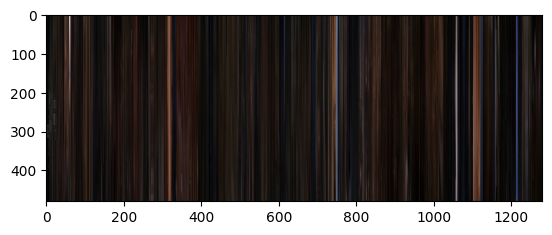

In [45]:
plt.imshow(imgtest)

In [94]:
red_table = [50, 100, 250, 450]
green_table = [50, 100, 250, 450]
blue_table = [100, 200, 500, 950]

'''Calculate power usage of a color value in a pixel'''
def calculate_power_for_color(color_value, power_table):
    if color_value < 60:
       return color_value * power_table[0] / (60 - 0)
    elif color_value < 135:
       return power_table[0] + power_table[1] * (color_value - 60) / (135 - 60)
    elif color_value < 190:
       return power_table[1] + power_table[2] * (color_value - 135) / (190 - 135)
    return power_table[2] + power_table[3] * (color_value - 190) / (255 - 190)

'''Calculate power per pixel'''
def calculate_power(r, g, b):
    return (
        calculate_power_for_color(r, red_table) +
        calculate_power_for_color(g, green_table) +
        calculate_power_for_color(b, blue_table)
    )

In [74]:
img.shape

(480, 1280, 3)

In [88]:
350 * np.mean(line_power) / (calculate_power(255, 255, 255) * 480)

10.149613689019656

In [122]:
def calculate_line_power(img):
    line_power = []
    for i in range(img.shape[1]):
        entry = 0
        for j in range(img.shape[0]):
            entry += calculate_power(img[j][i][0], img[j][i][1], img[j][i][2])
        line_power.append(entry)
    return line_power

In [110]:
tv_name = "LGOLED55BXPUA"
min_power_consumption = 106
max_power_consumption = 295

In [105]:
price_per_hour = 10 #10 DKK
movie_length_hours = 2

In [123]:
def calculate_cost(min_power_consumption, max_power_consumption, imgfile, movie_length_hours):
    img = io.imread(imgfile)
    line_power = calculate_line_power(img)
    
    return (
        min_power_consumption + 
            (max_power_consumption - min_power_consumption) * np.mean(line_power) 
        / (calculate_power(255, 255, 255) * 480)
    ) * movie_length_hours / 1000 * price_per_hour

In [124]:
calculate_cost(min_power_consumption, max_power_consumption, "tumblr_obenth3wAK1qhtovio1_1280.jpeg", movie_length_hours)

2.229615827841412

In [121]:
calculate_cost(min_power_consumption, max_power_consumption, "tumblr_mz3dq6K2wO1qhtovio1_1280.jpeg", movie_length_hours)

3.344343538765254